# ゾディアック事件の暗号Z340でメッセージを作る('24.05.25)


1968年から1974年にかけて、米国のカリフォルニア州サンフランシスコ市内で、連続殺人事件が起きた。
犯人はゾディアック(Zodiac)と名乗り、警察やマスコミへ暗号で書かれたメッセージを送りつけ、この事件はゾディアック事件と呼ばれた。

1969年11月8日、ゾディアックは暗号メッセージを葉書に書いて送りつけてきた。
340文字の記号で書かれていたことから「Z340」と呼ばれている暗号である。
それが下の画像だ。

%<img style="float:center;transform: rotate(0deg); height:10cm" src="./images/day_240525_code_zodiac_z340.jpg" />

```{figure} ./images/day_240525_code_zodiac_z340.jpg
---
height: 10cm
---
ゾディアック暗号Z340
```

半世紀以上もの間、Z340を解読しようとする試みはすべて失敗に終わってきた。
しかし、2020年12月5日、[Wolfram Mathematicaを道具にして](https://blog.wolfram.com/2021/03/24/the-solution-of-the-zodiac-killers-340-character-cipher/)Z340はついに解読された([解説論文](https://arxiv.org/abs/2403.17350))。
解読された内容が以下の文面だ。
ちなみに、当時のサンフランシスコでの死刑は、ガス室での執行だった。

[Zodiac-Z340](https://github.com/H0j3n/Zodiac-Z340/tree/main)

`````{admonition} 2020年に解読された暗号Z340
I hope you are having lots of fan in trying to catch me that wasnt me on the tv show which bringo up a point about me I am not afraid of the gas chamber becaase it will send me to paradlce all the sooher because e now have enough slaves to worv for me where every one else has nothing when they reach paradice so they are afraid of death I am not afraid because i vnow that my new life is life will be an easy one in paradice death

テレビ番組で報道されている私でない私を捕まえようとしてるけど、それを楽しんでくれているといいね。
私はガス室を恐れていない。なぜなら、ガス室は私を天国に送ってくれるから。他のみんなが何も持っていない場所でも、私のために働く奴隷がたくさんいる。みんな天国に着くと、死を恐れる。私は恐れない。私の新しい人生はパラダイスで楽なものになると知っているから。人生は死だ。
`````

今日は、Z340暗号のルールにもとづき、平文（アルファベットのみで、空白やピリオドあるいはカンマなどは含まない）をエンコードする[Zodiac-Z340](https://github.com/H0j3n/Zodiac-Z340/tree/main)を使い、Z340暗号でメッセージ画像を作ってみようと思う。

Zodiac-Z340は、コード例と記号フォントが含まれていて、平文から暗号分や暗号文字画像を生成することができる。下記がコードと実行例だ。
ちなみに、暗号化している平文の内容は「走れメロス」のストーリーを英文で解説したものだ。
その英文の空白やピリオド・カンマなどを削除した上で、先頭340文字からZ340暗号を生成させている。

In [1]:
# https://github.com/H0j3n/Zodiac-Z340/tree/main

import sys,os,random,re
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2
import time

#Zodiac Character (refer : Dcode)
zodiac = {
	"A" : ["char(79)","char(122)","char(108)","char(42)"],
	"B" : ["char(102)","char(95)"],
	"C" : ["char(112)"],
	"D" : ["char(65)","char(54)","char(83)"],
	"E" : ["char(66)","char(98)","char(78)","char(124)","char(52)","char(99)"],
	"F" : ["char(70)"],
	"G" : ["char(76)"],
	"H" : ["char(43)"],
	"I" : ["char(72)","char(80)","char(60)","char(121)","char(107)"],
	"J" : ["char(33)"],
	"K" : ["char(92)"],
	"L" : ["char(116)","char(100)","char(55)"],
	"M" : ["char(50)"],
	"N" : ["char(46)","char(62)","char(68)","char(89)","char(57)"],
	"O" : ["char(82)","char(94)","char(77)"],
	"P" : ["char(106)","char(56)"],
	"Q" : ["char(61)"],
	"R" : ["char(69)","char(88)","char(84)","char(49)","char(90)"],
	"S" : ["char(38)","char(85)","char(45)","char(74)"],
	"T" : ["char(37)","char(71)","char(35)","char(40)","char(58)"],
	"U" : ["char(113)","char(64)","char(47)"],
	"V" : ["char(53)"],
	"W" : ["char(87)","char(41)"],
	"X" : ["char(101)"],
	"Y" : ["char(67)","char(51)"],
	"Z" : ["char(114)"]
}

#Function Diagnol
def diagnol(x):
	col_1 = x[0] + x[9] + x[18] + x[27] + x[36] + x[45] + x[54] + x[63] + x[72] + x[81] + x[90] + x[99] + x[108] + x[117] + x[126] + x[135] + x[144]
	col_2 = x[136] + x[145] + x[1] + x[10] + x[19] + x[28] + x[37] + x[46] + x[55] + x[64] + x[73] + x[82] + x[91] + x[100] + x[109] + x[118] + x[127]
	col_3 = x[119] + x[128] + x[137] + x[146] + x[2] + x[11] + x[20] + x[29] + x[38] + x[47] + x[56] + x[65] + x[74] + x[83] + x[92] + x[101] + x[110]
	col_4 = x[102] + x[111] + x[120] + x[129] + x[138] + x[147] + x[3] + x[12] + x[21] + x[30] + x[39] + x[48] + x[57] + x[66] + x[75] + x[84] + x[93]
	col_5 = x[85] + x[94] + x[103] + x[112] + x[121] + x[130] + x[139] + x[148] + x[4] + x[13] + x[22] + x[31] + x[40] + x[49] + x[58] + x[67] + x[76]
	col_6 = x[68] + x[77] + x[86] + x[95] + x[104] + x[113] + x[122] + x[131] + x[140] + x[149] + x[5] + x[14] + x[23] + x[32] + x[41] + x[50] + x[59]
	col_7 = x[51] + x[60] + x[69] + x[78] + x[87] + x[96] + x[105] + x[114] + x[123] + x[132] + x[141] + x[150] + x[6] + x[15] + x[24] + x[33] + x[42]
	col_8 = x[34] + x[43] + x[52] + x[61] + x[70] + x[79] + x[88] + x[97] + x[106] + x[115] + x[124] + x[133] + x[142] + x[151] + x[7] + x[16] + x[25]
	col_9 = x[17] + x[26] + x[35] + x[44] + x[53] + x[62] + x[71] + x[80] + x[89] + x[98] + x[107] + x[116] + x[125] + x[134] + x[143] + x[152] + x[8]
	return col_1+";"+col_2+";"+col_3+";"+col_4+";"+col_5+";"+col_6+";"+col_7+";"+col_8+";"+col_9

#Function Dcode Symbol
def zodiac_cipher(x):
	#print("\nPlease Enter this in Dcode!\n")
	strs =""
	for i in x.split(";"):
        	for j in i:
                	if j in zodiac.keys():
                        	strs += random.choice(zodiac[j])
                	else:
                        	strs += j
        	strs += "\n"
	return strs

#Function Font Changes
def font_change(x):
	strs =""
	for i in x.split("\n")[:-1]:
		temp = i.replace(")",";").replace("char(",";").replace(";;",";")
		for j in temp.split(";"):
			try:	
				if int(j) in [1,2,3,4,5,6,7,8,9,0]:
					strs += j
				else:
					strs += chr(int(j))
			except:
				strs += j
		strs += "\n"
	return strs

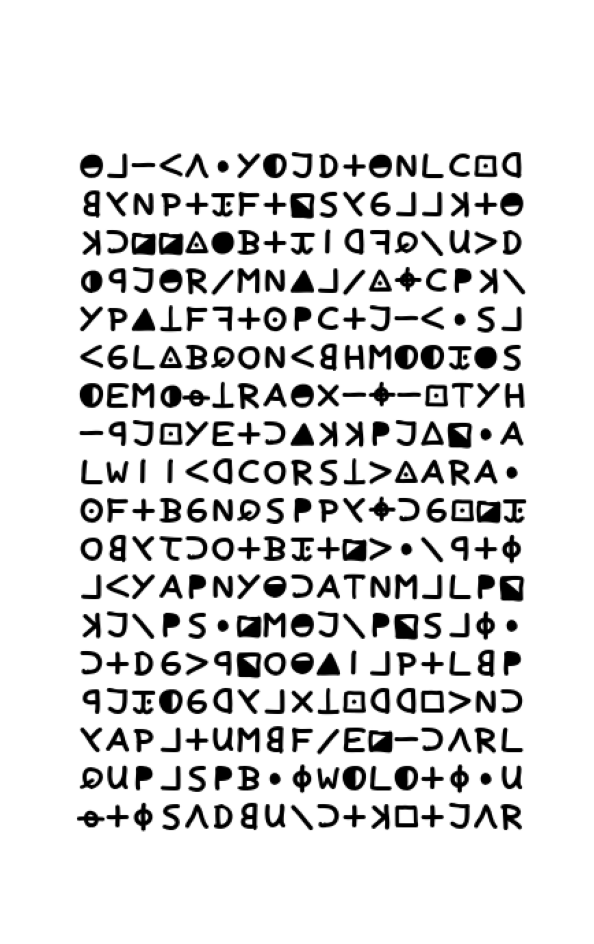

In [2]:
my_text="Melos is a naive young shepherd with a sense of justice. He lives in a land ruled by Dionysius, a tyrant king who has killed many people, including his family members, due to his solitude and distrust of people. When Melos hears about the King's deeds, he is outraged, and he decides to assassinate the King. He sneaks into the castle with a knife but is caught and arrested. Although Melos defiantly owns up to his plan to kill the King, he pleads with the cynical tyrant to postpone his execution for three days so that he can return home to arrange his younger sister's marriage. As collateral for his pledge to return, Melos offers his friend Selinuntius as a hostage, who would be executed in his stead should Melos not return in time. The King agrees to Melos' conditions but threatens to kill him should he return moments too late. Melos insists that saving his own life is not his intention. Informed of the situation, Selinuntius readily agrees to the role that Melos assigned him without asking."
inputs=my_text.replace(' ', '').replace('\'', '').replace(',', '').strip().upper()[:306]

#print("\nBox 1 : ",end="")
#print(inputs[:153],"\n")
box1 = diagnol(inputs[:153])
#for i in box1.split(";"):
#        print(i)
dcode1 = zodiac_cipher(box1)
#print(dcode1)
fontchange1 = font_change(dcode1)

#print("\n\nBox 2 : ",end="")
#print(inputs[153:],"\n")
box2 = diagnol(inputs[153:])
#for i in box2.split(";"):
#	print(i)
dcode2 = zodiac_cipher(box2)
#print(dcode2)
fontchange2 = font_change(dcode2)
#print("\n[Full Dcode]\n")
#print("Please Use it in here : https://www.dcode.fr/zodiac-killer-cipher\n")
fulldcode = dcode1 + dcode2
#print(fulldcode)
#print("\n[Full Font Code]\n")
#print("Please Use it in here : http://zodiackillerciphers.com/cipher-explorer/\n")
fullfontcode = fontchange1+fontchange2
#print(fullfontcode)

import matplotlib.pyplot as plt

# 暗号画像を生成する
img = np.ones((1050-17*22,420,3),np.uint8)*255
b,g,r,a = 0,0,0,0
# フォントを読み込む
fontpath = "/Library/Fonts/z340-z408.ttf"
font = ImageFont.truetype(fontpath, 32)
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)
h=100 # 文字を描き始める最初の高さ
for i in fullfontcode.split("\n"):
	draw.text((50, h), i.strip(), font = font, fill = (b, g, r, a))
	h += 28
img = np.array(img_pil)

fig=plt.figure(figsize=[12,12])
plt.imshow(img)
plt.axis('off')
plt.show()
#cv2.imwrite("zodiac.png", img)

## 解読（デコード）するコードも書いてみよう

現時点の[Zodiac-Z340]には、エンコード用のコードしか含まれていない。
そのため、今回は「平文⇒暗号画像を作り出す」という作業をしてみた。
解読（デコード）用の関数は、近々書いてみようと思う。


%<img style="float:center;transform: rotate(0deg); height:14cm" src="./images/day_240525_code_zodiac_wanted_poster.png" />

```{figure} ./images/day_240525_code_zodiac_wanted_poster.png
---
height: 14cm
---
ゾディアックの似顔絵
```